In [1]:
# librerias
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import matplotlib.ticker as ticker


In [2]:

edades = np.array([f'{i}-{i+4}' for i in range(0, 101, 5)])

hombres = [929686,
           1150375,
           1296012,
           1273951,
           1242864,
           1283120,
           1384020,
           1563840,
           1923796,
           2019607,
           1869683,
           1719869,
           1496882,
           1211902,
           1028803,
           814281,
           514750,
           365040,
           143322,
           29196,
           4382]

mujeres = [880082,
           1086536,
           1221361,
           1197648,
           1173169,
           1242519,
           1367915,
           1568488,
           1892599,
           1977575,
           1869996,
           1773166,
           1591651,
           1336099,
           1196824,
           1026618,
           742036,
           639505,
           320933,
           90062,
           15257]

In [3]:
data = {'edades': edades[::-1], 
        'hombres': hombres[::-1], 
        'mujeres': mujeres[::-1]}

df = pd.DataFrame(data)

In [4]:
df

,edades,hombres,mujeres
0,100-104,4382,15257
1,95-99,29196,90062
2,90-94,143322,320933
3,85-89,365040,639505
4,80-84,514750,742036
5,75-79,814281,1026618
6,70-74,1028803,1196824
7,65-69,1211902,1336099
8,60-64,1496882,1591651
9,55-59,1719869,1773166


In [5]:
df['hombres'] = df['hombres'] / -1000
df['mujeres'] = df['mujeres'] / 1000

([<matplotlib.axis.XTick at 0x20a09f299a0>,
 [Text(-2000, 0, '2M'),
  Text(-1000, 0, '1M'),
  Text(0, 0, '0'),
  Text(1000, 0, '1M'),
  Text(2000, 0, '2M')])

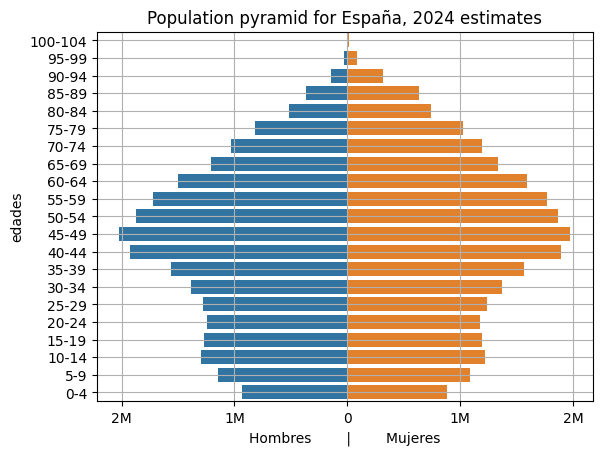

In [6]:
ax1 = sns.barplot(x='hombres', y='edades', data=df)
ax2 = sns.barplot(x='mujeres', y='edades', data=df)
plt.title("Population pyramid for España, 2024 estimates")
plt.xlabel("Hombres        |        Mujeres")
plt.grid()
plt.xticks(ticks=[-2000, -1000, 0, 1000, 2000],
labels=['2M', '1M', '0', '1M', '2M'])

In [7]:
pd.read_excel('36774.xlsx').iloc[5:105,3]

C:\Users\diego\AppData\Roaming\Python\Python312\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


5      2069.000000
6              NaN
7         3.020740
8         0.088256
9         0.061880
          ...     
100     147.692335
101     162.794013
102     178.831989
103     195.869133
104     213.797074
Name: Unnamed: 3, Length: 100, dtype: float64

In [8]:
mort_hombres = pd.read_excel('36774.xlsx').iloc[5:105,0:49]
ages         = mort_hombres.columns[0]

C:\Users\diego\AppData\Roaming\Python\Python312\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


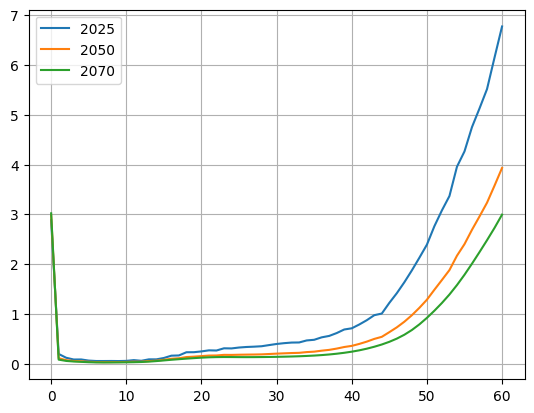

In [27]:
# 2024 <= i <= 2071

plt.grid()

i    = 2025
años = 60
v = np.array(mort_hombres.iloc[2:años+3,2072-i])
plt.plot(np.arange(0,años+1,1), v, label = str(i))


i    = 2050
años = 60
v = np.array(mort_hombres.iloc[2:años+3,2072-i])
plt.plot(np.arange(0,años+1,1), v, label= str(i))

i    = 2070
años = 60
v = np.array(mort_hombres.iloc[2:años+3,2072-i])
plt.plot(np.arange(0,años+1,1), v, label= str(i))

plt.legend()
plt.show()


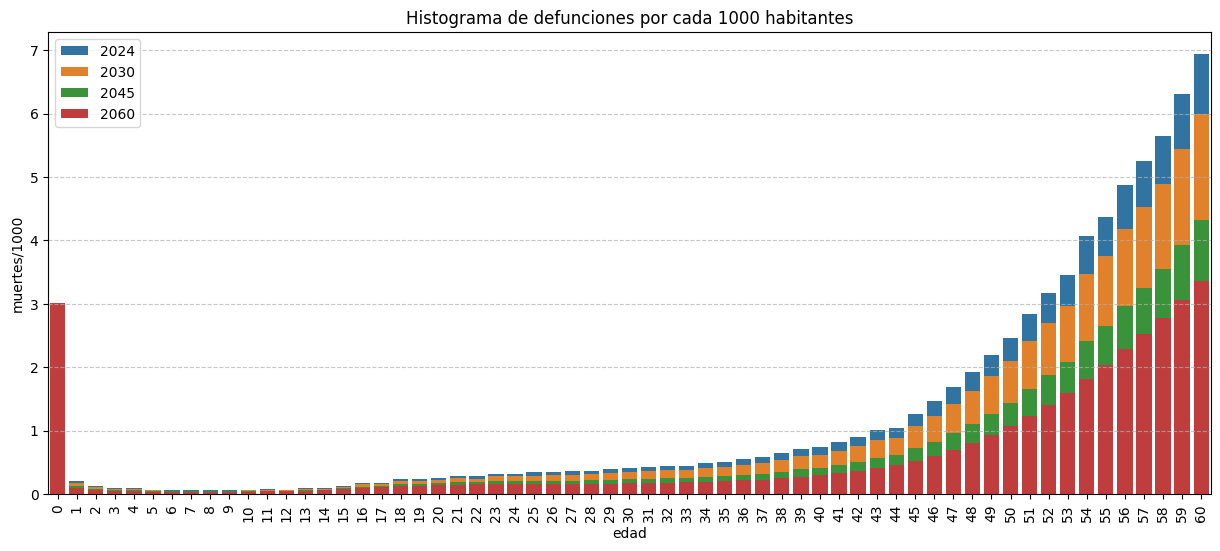

In [62]:
plt.figure(figsize=(15, 6))

v = [2030,2060,2024,2045]

for año in sorted(v):

    i    = año
    años = 60
    prob = np.array(mort_hombres.iloc[2:años+3,2072-i])
    edad = np.arange(0,años+1,1)

    df = pd.DataFrame({
        'edad': edad,
        'muertes/1000': prob
    })

    sns.barplot(x='edad', y='muertes/1000',data=df, label = i)


# Agregar títulos y etiquetas
plt.title('Histograma de defunciones por cada 1000 habitantes')
plt.xlabel('edad')
plt.ylabel('muertes/1000')
plt.legend()
# Mostrar el histograma
plt.xticks(rotation=90)  # Rotar etiquetas del eje x si es necesario
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()